# CorrelAid machine-learning spring school 
## Section 5: Data Exploration 

Session takes place **Tuesday, 29.03.2022, 18h CEST**.

Author: Sebastian Zezulka
### **to be distributed on Wednesday, 23.03.2022**

During the spring school, we will consider the "Forest Cover Type Dataset" from [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/covertype). In this section, you will learn how to set up a primary data exploration and preparation in the machine learning pipeline.
We will take a close look at the practical problem and the data set. For the latter, we will discuss descriptive statistics and typical visualisations (matplotlib, seaborn), getting variable information, data cleaning (missings, recodings, normalisation) and, finally, discuss balanced/unbalanced samples and the use of test-training sets.

infos and ideas: https://towardsdatascience.com/predicting-forest-cover-types-with-the-machine-learning-workflow-1f6f049bf4df

### 0. Set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Load Data
**Task:** Download the CSV data from the given URL/repo and inspect a few rows from it.

In [2]:
# Read in csv data
forest_data = pd.read_csv("data/covtype.csv")

# Inspect first few rows of the data
forest_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [7]:
forest_data['Wilderness_Area_Type'] = (forest_data.iloc[:,11:15] == 1).idxmax(1)

In [8]:
forest_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wilderness_Area_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,5,Wilderness_Area2
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,5,Wilderness_Area2
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,2,Wilderness_Area2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,2,Wilderness_Area2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,5,Wilderness_Area2


## 2. Descriptives and Question
**Task:** What is the Cover Type with the highest mean distance to fire point? what is the std of hillshades at noon? What measures Elevation, Aspect, Slope and in what scales? How many observation do we have, how many per cover type? 

**Task:** Based on the shortened description of the data below, compute the ...

**Task:** Create three plots of 

**Task:** Subset the dataset to...

**Task:** What was the original purpose of collecting the data we are using now? How did the collection?

- what is the task: classify/predict cover_type
    - one vs many, one vs one
- add questions about dataset
- y labels, interpretations of features 

In [7]:
nRow, nCol = forest_data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 581012 rows and 55 columns


In [6]:
forest_data.info()
#forest_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


(array([51.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([2.27230869e-03, 1.55927532e+02, 3.11852792e+02, 4.67778052e+02,
        6.23703311e+02, 7.79628571e+02, 9.35553831e+02, 1.09147909e+03,
        1.24740435e+03, 1.40332961e+03, 1.55925487e+03]),
 <BarContainer object of 10 artists>)

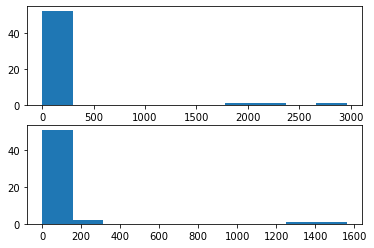

In [18]:
# Descriptive Statistics
data_describe = forest_data.describe()
display(data_describe)

fig, ax = plt.subplots(2)
ax[0].hist(data_describe.loc['mean',:])
ax[1].hist(data_describe.loc['std',:])

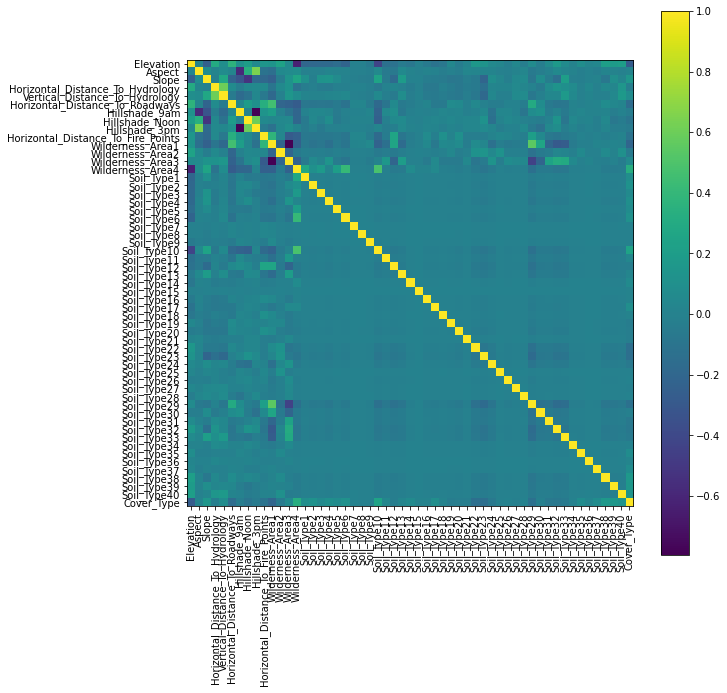

In [20]:
# Correlation Matrix of Features
labels = forest_data.columns

x_ = range(len(labels))
cor = forest_data[labels].corr()

fig, ax = plt.subplots(1,1, figsize=(10, 10))
im = ax.imshow(cor)
ax.set_xticks(x_)
ax.set_yticks(x_)
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels, rotation=0)

plt.colorbar(im, ax=ax)
plt.show()

## add histograms or density plots of features

### 2.1 Numerical Features

In [50]:
col_names[0:20]

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6']

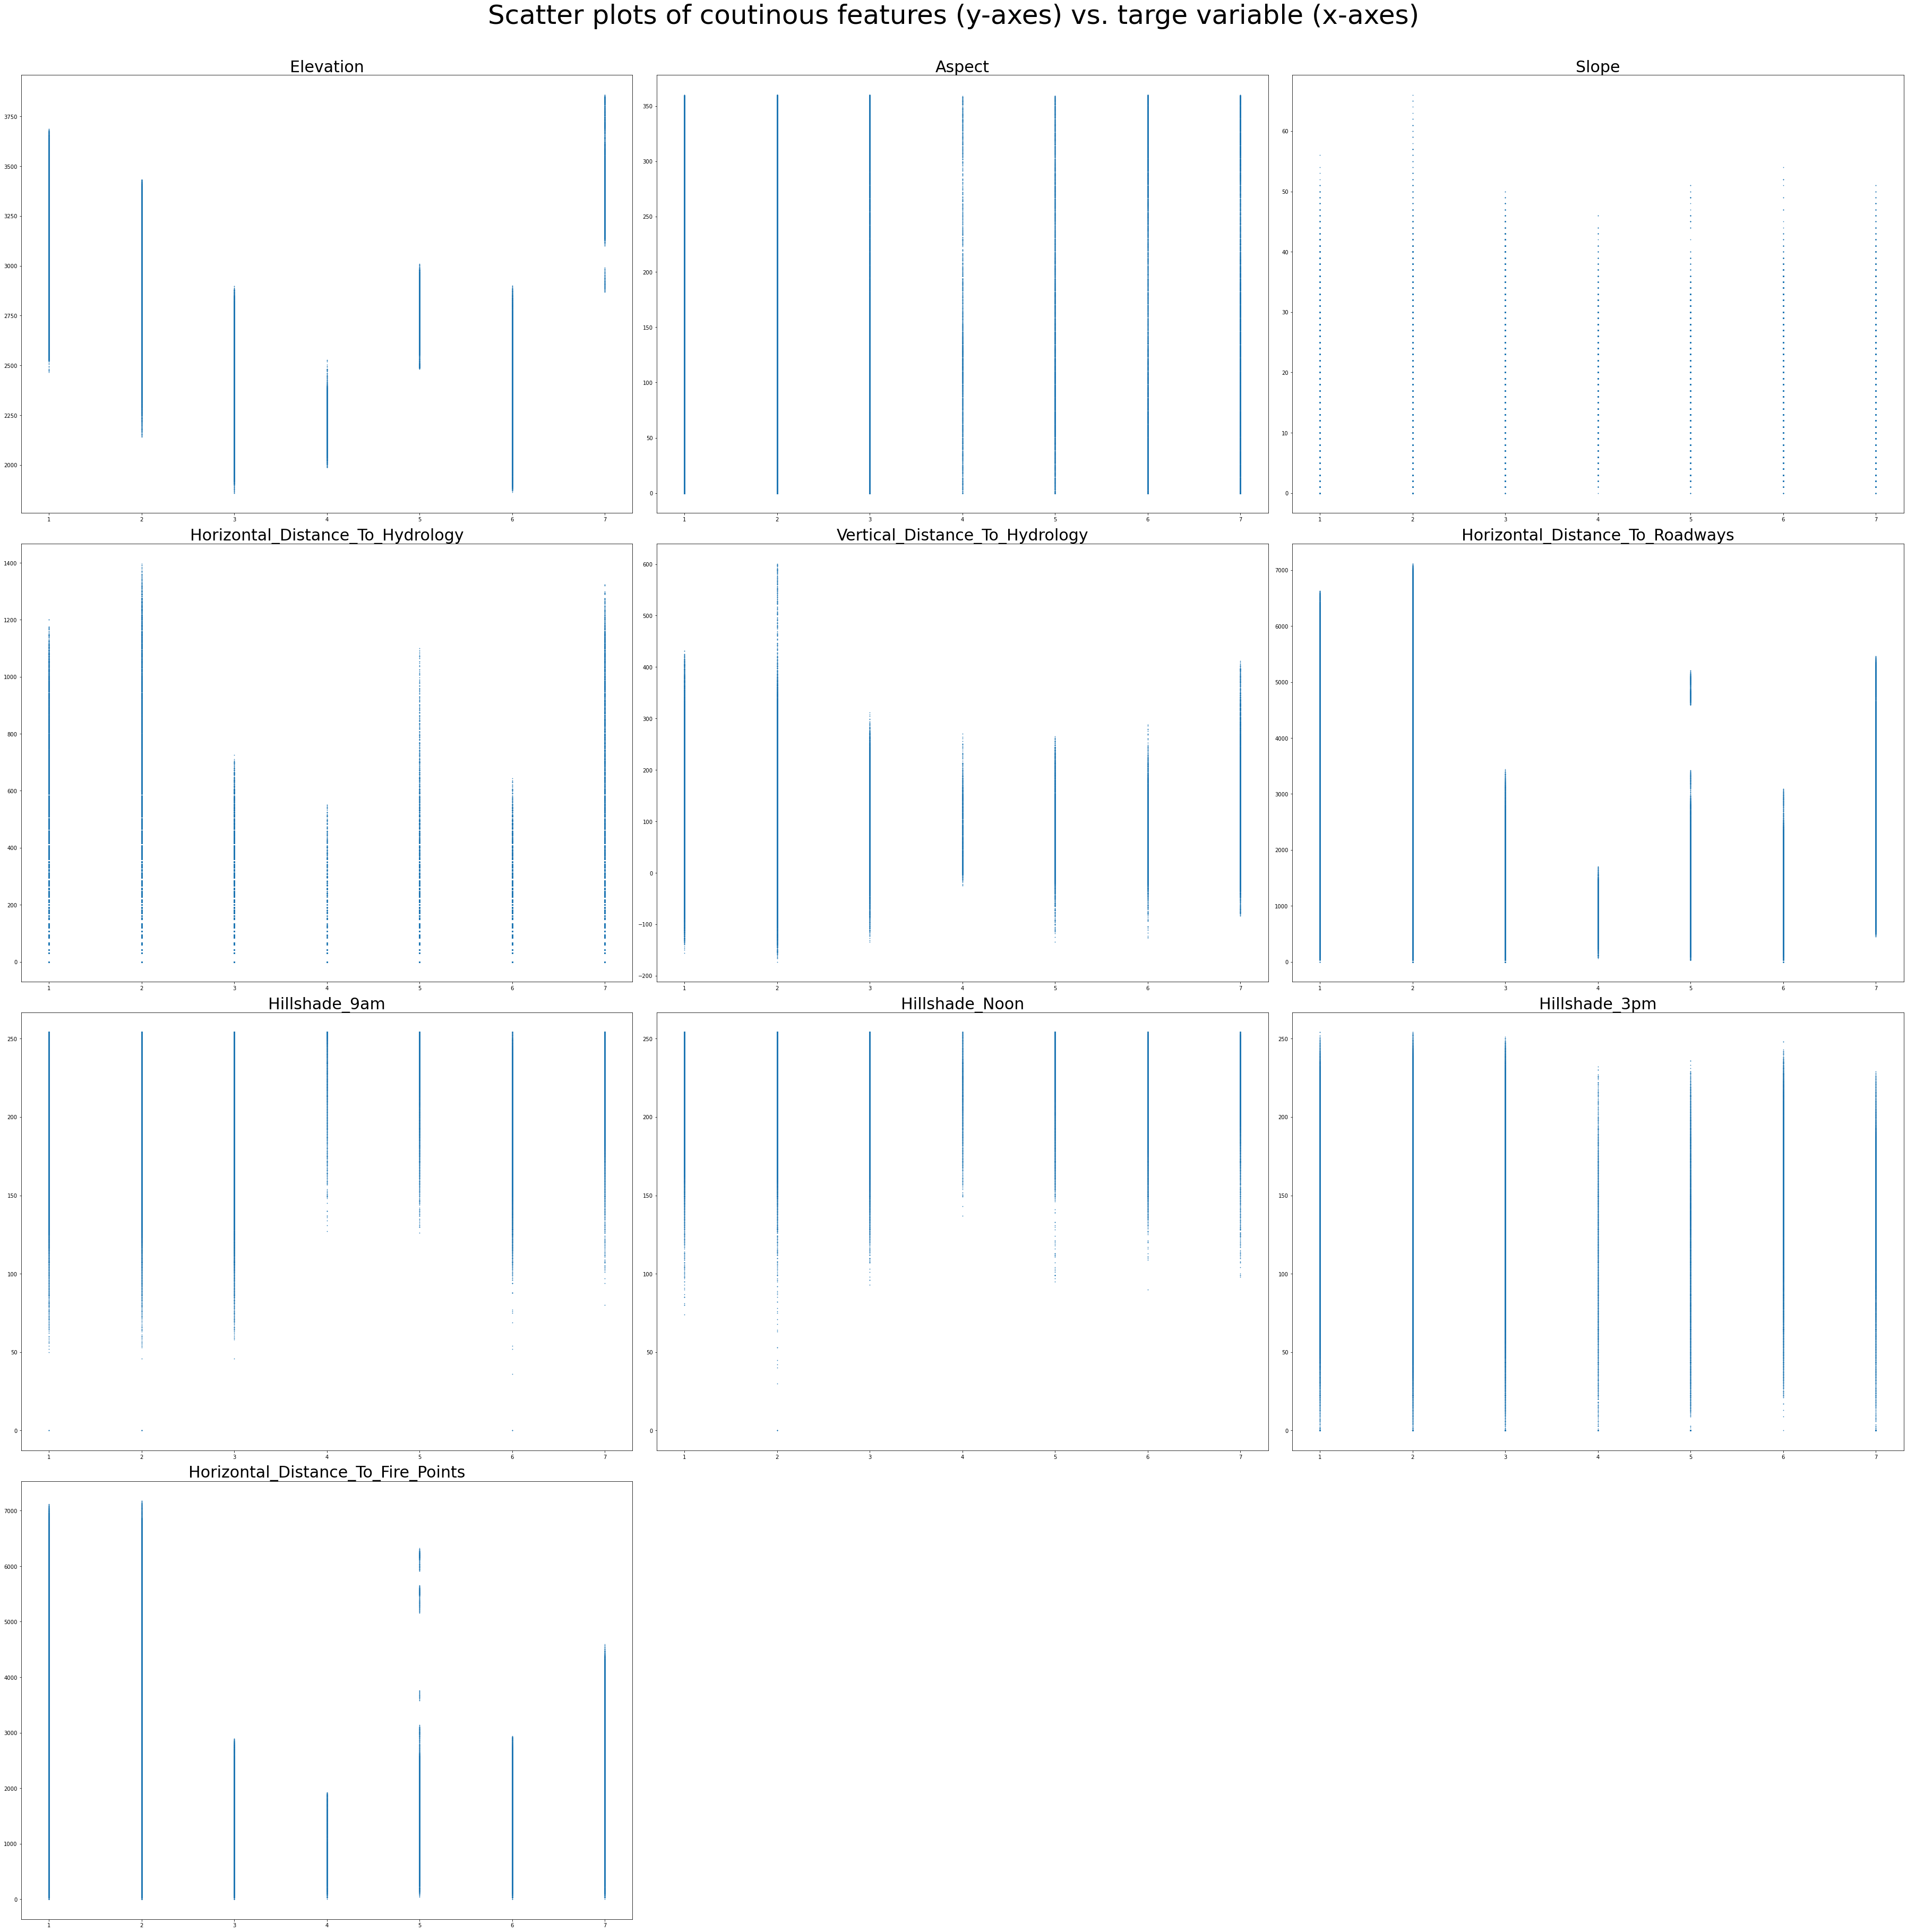

In [57]:
# Scatter Plot of numerical Features
'''
labels = forest_data.columns

#fig = plt.figure(figsize=(15,15))
c=1
for l in range(10):
    for r in range(10):
        #plt.subplot(10,10,c)
        #plt.figure(figsize=(10, 4))
        plt.scatter(forest_data.iloc[:,l].values, forest_data.iloc[:,r].values)
        plt.xlabel(labels[l])
        plt.ylabel(labels[r])
        plt.tight_layout()
        plt.show();
        c += 1

#fig.suptitle('Histogramms of observations', x=0.5, y=1)
#fig.tight_layout()
#fig.show()
'''
# Scatter plots of the target variable vs. features
features = np.arange(0, len(forest_data.transpose()))
col_names = list(forest_data.columns)

fig = plt.figure(figsize=(50,50))
c=1
for i in features[0:10]:
    plt.subplot(4,3,c)
    plt.scatter(forest_data.iloc[:,-1], forest_data.iloc[:,i], s=0.5)
    plt.title(col_names[i], size=30)
    c+=1

fig.suptitle('Scatter plots of coutinous features (y-axes) vs. targe variable (x-axes)', x=0.5, y=1.01,size=50)
fig.tight_layout()
#fig.show()

### 2.2 Categorical Features
- OneHotEcoding, Categorical Variables
- change between formats!

In [1]:
'''
from sklearn.preprocessing import LabelEncoder

target_enc = LabelEncoder()
target_enc.fit(df["class"])
print(target_enc.classes_)
df["class"] = target_enc.transform(df["class"])
'''
'''
from sklearn.preprocessing import OneHotEncoder

drop_binary_enc = OneHotEncoder(drop='if_binary', handle_unknown="ignore", sparse=False).fit(X_train)  # use sparse for bigger data!
X_train = drop_binary_enc.transform(X_train)
X_test = drop_binary_enc.transform(X_test)
'''

'\nfrom sklearn.preprocessing import OneHotEncoder\n\ndrop_binary_enc = OneHotEncoder(drop=\'if_binary\', handle_unknown="ignore", sparse=False).fit(X_train)  # use sparse for bigger data!\nX_train = drop_binary_enc.transform(X_train)\nX_test = drop_binary_enc.transform(X_test)\n'

### 3. Preprocessing 

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#TODO 
- shuffle data?
- write function that normalises data by hand to show effect

In [68]:
# test and training set split
X = forest_data.drop(['Cover_Type'] , axis = 1)
y = forest_data['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)
X_train.shape

(406708, 54)

In [69]:
X.shape

(581012, 54)

In [70]:
X_cat_train = X_train.iloc[:, 10:54].values
X_num_train = X_train.iloc[:, 0:10].values

X_cat_test = X_test.iloc[:, 10:54].values
X_num_test = X_test.iloc[:, 0:10].values

scaler = StandardScaler()
scaler.fit(X_num_train)
X_num_train_trans = scaler.transform(X_num_train)
X_num_test_trans = scaler.transform(X_num_test)

X_train_trans = np.hstack((X_num_train_trans, X_cat_train))
X_test_trans = np.hstack((X_num_test_trans, X_cat_test))
X_train_trans.shape

(406708, 54)

In [ ]:
forest_data_trans = pd.DataFrame(np.vstack((X_train_trans, X_test_trans)))
forest_data_trans.head()